Diese Notebook soll aus McDonalds-Reviews bestimmen, ob diese Positiv oder Negativ sind. 

In [ ]:
Dazu müssen erstmal die Testdaten geladen und ausgepackt werden

In [79]:
%pip install kaggle
!kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews
!unzip mcdonalds-store-reviews.zip


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
mcdonalds-store-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


Im nächsten Schritt werden die Abhängigkeiten runtergeladen 

In [1]:
%pip install pandas
%pip install matplotlib




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Dann werden die imports geladen

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


Wir laden zuerst die Daten aus dem CSV in Pandas DataFrame um sie zu analysieren

In [9]:
df = pd.read_csv('McDonald_s_Reviews.csv', encoding="latin-1")


In [10]:
df.head()


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [11]:
df.shape
df.columns


Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

Nun extrahieren wir die Zeilen review für train_data und die Zeile rating für die labels

In [33]:
all_data = df['review'].to_numpy()
all_label_as_strings = df['rating'].to_numpy()



Star Ratings werden gerade noch als 1 Star String bis zu einem 5 star String gespeichert. Mit einem numerischen System können neuronale Netzwerke besser umgehen, deshalb formatiere ich die labels zu interges zwischen 1 und 5.

In [131]:
all_label_data = np.array([int(item.split()[0]) for item in all_label_as_strings])



Aufteilung in Trainings, Validierungs und Testdaten

In [132]:
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label_data, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(26716,)
(6680,)
(26716,)
(6680,)


Im nächsten Schritt, müssen wir den Text auch zu einer Dict Repräsentation umbauen. 

Mein Buch sagt folgendes dazu: 
Deep learning models, being differentiable functions, can only process numeric tensors: they can’t take raw text as input. Vectorizing text is the process of transforming
text into numeric tensors. Text vectorization processes come in many shapes and
forms, but they all follow the same template (see figure 11.1):

First, you standardize the text to make it easier to process, such as by converting
it to lowercase or removing punctuation: 

You split the text into units (called tokens), such as characters, words, or groups
of words. This is called tokenization.

You convert each such token into a numerical vector. This will usually involve
first indexing all tokens present in the data.

Wir können diese drei Schritte alle selber Implementieren, aber TextVectorization Layer von keras, macht dies alles schon für uns und wird folgende Setting für: will use the setting “convert to lowercase and
remove punctuation” for text standardization, and “split on whitespace” for tokenization

In [39]:
from tensorflow.keras.layers import TextVectorization
text_vectorization_simple = TextVectorization(
    output_mode="int",
)

So können wir das ganze dann auf unsere Testdaten anwenden

In [40]:
text_vectorization_simple.adapt(train_data)


Und auch auf Dictonary zugreifen, durch:

In [41]:
text_vectorization_simple.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'to',
 'i',
 'a',
 'was',
 'is',
 'they',
 'for',
 'it',
 'in',
 'food',
 'of',
 'my',
 'this',
 'service',
 'order',
 'mcdonalds',
 'not',
 'good',
 'but',
 'you',
 'at',
 'that',
 'on',
 'with',
 'very',
 'have',
 'me',
 'there',
 'are',
 'place',
 'get',
 'were',
 'no',
 'so',
 'had',
 'its',
 'we',
 'drive',
 'just',
 'be',
 'one',
 'fast',
 'time',
 'like',
 'when',
 'excellent',
 'staff',
 'out',
 'all',
 'up',
 'if',
 'always',
 'great',
 'as',
 'go',
 'here',
 'clean',
 'your',
 'people',
 'or',
 'she',
 'only',
 'location',
 'got',
 'fries',
 'thru',
 'minutes',
 'what',
 'dont',
 'from',
 'their',
 'even',
 'an',
 'manager',
 'customer',
 'nice',
 'been',
 'never',
 'back',
 'ordered',
 'friendly',
 'because',
 'through',
 'ever',
 'wait',
 'them',
 'can',
 'bad',
 'went',
 'then',
 'rude',
 'do',
 'our',
 'didnt',
 'would',
 'slow',
 'employees',
 'about',
 'long',
 'more',
 'asked',
 'worst',
 'will',
 'other',
 'after',
 'has',
 'wrong',
 'b

Zum Verständnis hier ein Beispiel um ein Text zu De- und Encoden:

In [42]:
vocabulary = text_vectorization_simple.get_vocabulary()
test_sentence = "Why does it look like someone spit on my food? I had a normal transaction, everyone was chill and "
encoded_sentence = text_vectorization_simple(test_sentence)
print(encoded_sentence)
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)


tf.Tensor(
[ 237  402   11  330   47  297 2672   26   15   13    5   38    6  616
 2824  369    7 2378    3], shape=(19,), dtype=int64)
why does it look like someone spit on my food i had a normal transaction everyone was chill and


Bags of Words approach using a (UNIGRAMS) WITH BINARY ENCODING (multi hot encoding):

In [159]:
text_vectorization_mult_hot = TextVectorization(
 max_tokens=30000,
ngrams=3,
 output_mode="multi_hot",
)

Make numpy arrays to tensorflow datasets

In [160]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_data)
test_dataset = tf.data.Dataset.from_tensor_slices(test_data)
train_dataset.batch(batch_size)
test_dataset.batch(batch_size)

<_BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

In [161]:
text_vectorization_mult_hot.adapt(train_data) 

binary_1gram_train_ds = text_vectorization_mult_hot(train_data)
binary_1gram_test_ds = text_vectorization_mult_hot(test_data)

In [162]:
binary_1gram_test_ds

<tf.Tensor: shape=(6680, 30000), dtype=float32, numpy=
array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [164]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model(max_tokens=30000, hidden_dim=16):
 inputs = keras.Input(shape=(max_tokens,))
 x = layers.Dense(hidden_dim, activation="relu")(inputs)
 x = layers.Dropout(0.5)(x)
 outputs = layers.Dense(5, activation="softmax")(x)
 model = keras.Model(inputs, outputs)
 model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"], 
 )
 return model


In [165]:
train_label_one_hot = tf.one_hot(train_label, 5)
train_label_one_hot.shape

TensorShape([26716, 5])

In [166]:
model = get_model()
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("binary_1gram.keras",
 save_best_only=True)
]
history = model.fit(binary_1gram_train_ds,train_label_one_hot,
validation_split=0.2,
 epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 30000)]           0         
                                                                 
 dense_38 (Dense)            (None, 16)                480016    
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 5)                 85        
                                                                 
Total params: 480,101
Trainable params: 480,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
668/668 [==============================] - 6s 8ms/step - loss: 0.3987 - accuracy: 0.3144 - val_loss: 0.2849 - val_accuracy: 0.4459
Epoch 2/10
668/668 [======================

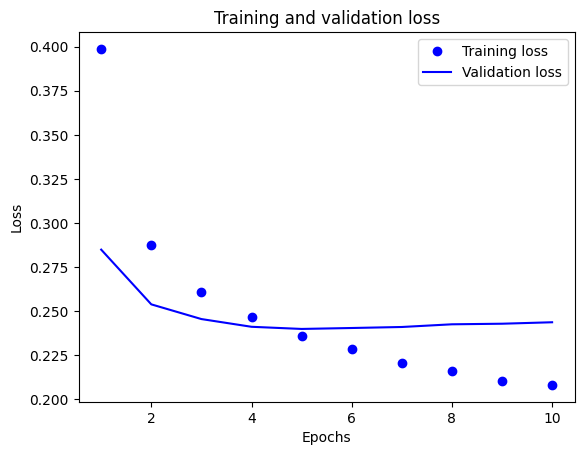

In [167]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [168]:
test_label_one_hot = tf.one_hot(test_label, 5)
test_label_one_hot.shape
model.evaluate(binary_1gram_test_ds,test_label_one_hot)

209/209 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.4725


[0.24309901893138885, 0.47245508432388306]

Processing words as a sequence: The sequence model approach

In [169]:
max_length = 600
max_tokens = 20000
text_vectorization_sequence = TextVectorization(
 max_tokens=max_tokens,
 output_mode="int",
 output_sequence_length=max_length,
)
text_vectorization_sequence.adapt(train_data)

int_train_ds = text_vectorization_sequence(train_data)

int_test_ds = text_vectorization_sequence(test_data)

In [172]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.summary()

2023-06-22 13:10:48.645369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 13:10:48.647319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 13:10:48.648838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, None)]            0         
                                                                 
 tf.one_hot_1 (TFOpLambda)   (None, None, 20000)       0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               5128448   
 nal)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 5)                 325       
                                                                 
Total params: 5,128,773
Trainable params: 5,128,773
Non-trainable params: 0
________________________________________________

2023-06-22 13:10:48.904278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 13:10:48.905931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 13:10:48.907737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Wie lange brauch das Model bei dir ?

In [173]:
callbacks = [
 keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
 save_best_only=True)
]
model.fit(int_train_ds, train_label_one_hot, epochs=10,validation_split=0.2,

 callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(int_test_ds):.3f}")

Epoch 1/10


2023-06-22 13:10:53.374739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 13:10:53.377434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 13:10:53.379803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

  3/668 [..............................] - ETA: 1:06:33 - loss: 0.6889 - accuracy: 0.1250

KeyboardInterrupt: 